# Instalation of packages

In [ ]:
# Use conda env from here: https://github.com/sbobek/lux

In [1]:
! python --version

Python 3.8.17


In [2]:
! which python

/home/mmozolewski/anaconda3/envs/luxenv/bin/./python


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
import sys
print(os.getcwd())

/media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/inxai/examples/jgama


## LUX

In [82]:
! conda install -c conda-forge numpy=1.22.4

/bin/bash: line 1: conda: command not found


In [ ]:
! conda install -c conda-forge nbclassic
! conda install -c anaconda chardet
! conda install -c anaconda scikit-learn

In [ ]:
# ! pip install uid3
# ! conda install -c conda-forge uid3

In [5]:
module_path = "/media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/lux/pyuid3/src"  # quick-fix
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
# sys.path.insert(0, module_path)

# import pyuid3
from pyuid3.data import Data
from pyuid3.uid3 import UId3

/media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/lux/pyuid3/src


In [6]:
module_path = "/media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/lux"  # quick-fix
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

from lux.lux import LUX
print(dir(LUX))

/media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/lux
['CF_REPRESENTATIVE_MEDOID', 'CF_REPRESENTATIVE_NEAREST', 'REPRESENTATIVE_CENTROID', 'REPRESENTATIVE_NEAREST', '_LUX__get_covered', '_LUX__inverse_sampling', '_LUX__oversample', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'counterfactual', 'create_sample_bb', 'fit', 'fit_bounding_boxes', 'generate_uarff', 'get_params', 'justify', 'predict', 'set_params', 'to_HMR']


In [ ]:
# %cd /media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/inxai/examples/jgama
# %cd ~/

## graphviz

In [7]:
import graphviz

## rulekit

In [8]:
import numpy as np
print(np.__version__)

1.22.4


In [11]:
! conda install -c conda-forge jpype1

/bin/bash: line 1: conda: command not found


In [ ]:
# Other:
%cd /media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/

! git clone https://github.com/adaa-polsl/RuleXAI.git
! cd /media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/RuleXAI && sudo chown -R $USER:$USER . && rm -rf rulexai.egg-info
! cd /media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/RuleXAI && pip install .

In [ ]:
# !sudo apt update
# !sudo apt install openjdk-8-jdk

# !sudo add-apt-repository ppa:webupd8team/java
# !sudo apt-get update
# !sudo apt-get install oracle-java8-installer

!wget https://corretto.aws/downloads/latest/amazon-corretto-8-x64-linux-jdk.deb
!sudo dpkg -i amazon-corretto-8-x64-linux-jdk.deb
!java -version


In [10]:
# Po zainstalowaniu OpenJDK 8, możesz zmienić domyślną wersję Javy za pomocą polecenia update-alternatives:
# sudo update-alternatives --config java
# Polecenie to wyświetli listę dostępnych wersji Javy. Wybierz OpenJDK 8 z listy.
# Jednakże, jeśli pracujesz w środowisku Jupyter Notebook, zmiana wersji Javy na poziomie systemu może nie mieć wpływu na środowisko notebooka. W takim przypadku musisz skonfigurować środowisko Jupyter Notebook, aby korzystać z odpowiedniej wersji Javy.
# Jednym z możliwych rozwiązań może być użycie biblioteki os do zmiany zmiennej środowiskowej JAVA_HOME, która wskazuje na wersję Javy, która powinna być używana:
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["JAVA_HOME"] = " /usr/lib/jvm/java-1.8.0-amazon-corretto"

In [72]:
!find / -name 'mockito*.jar' 2>/dev/null

/opt/edrone/Recommender/Recommender-1.0-SNAPSHOT.lib/mockito-core-4.7.0.jar
/opt/edrone/Sentinel/Sentinel-1.0-SNAPSHOT.lib/mockito-core-4.7.0.jar
/opt/edrone/IAIService/IAIService-Service-1.0-SNAPSHOT.lib/mockito-core-4.7.0.jar
^C


In [76]:
# os.environ['CLASSPATH'] = "/opt/edrone/Sentinel/Sentinel-1.0-SNAPSHOT.lib"

In [11]:
! java -version
! readlink -f $(which java)

openjdk version "17.0.4.1" 2022-08-12 LTS
OpenJDK Runtime Environment Corretto-17.0.4.9.1 (build 17.0.4.1+9-LTS)
OpenJDK 64-Bit Server VM Corretto-17.0.4.9.1 (build 17.0.4.1+9-LTS, mixed mode, sharing)
/usr/lib/jvm/java-17-amazon-corretto/bin/java


In [15]:
! yes | python -m rulekit download_jar

Fetching latest RuleKit release version:  v1.5.2
Download finished!
Package is ready to use.
yes: standard output: Broken pipe


In [12]:
! python -c "import rulekit; print(rulekit.__path__)"

['/home/mmozolewski/anaconda3/envs/luxenv/lib/python3.8/site-packages/rulekit']


In [13]:
from rulekit import RuleKit

RuleKit.init()
print(RuleKit.version)

1.5.2


In [14]:
print(dir(RuleKit))

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_class_path', '_detect_jre_type', '_jar_dir_path', '_jre_type', '_launch_jvm', '_logger', '_read_versions', '_rulekit_jar_file_path', '_setup_logger', 'init', 'version']


# Iris data

In [ ]:
# ! conda update scikit-learn

In [64]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
from numpy import argmax, sqrt

import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

from sklearn.preprocessing import StandardScaler
# import pickle

import seaborn as sns
import copy

# from rulekit.regression import RuleRegressor
from rulekit.classification import RuleClassifier
from rulekit.params import Measures

import graphviz
from IPython.display import SVG, Image

from typing import Union

iris = datasets.load_iris()
print(iris.keys())

iris_df = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )
iris_df

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [16]:
iris_df['species'] = iris_df['target'].apply(lambda x: 'setosa' if x==0 else ('versicolor' if x==1 else 'virginica'))
iris_df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

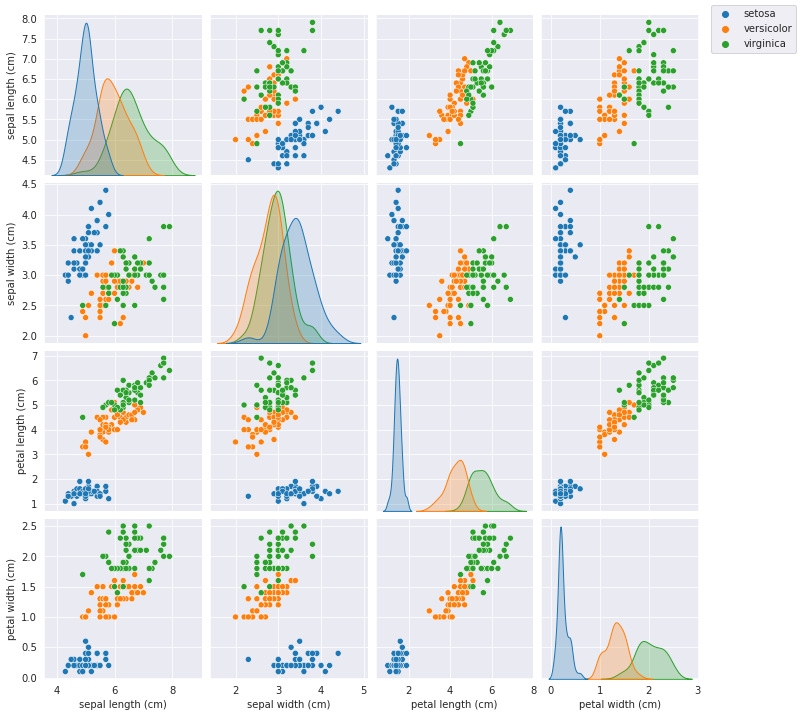

In [7]:
# Plot the pairwise relationships in the dataset
sns_plot = sns.pairplot(iris_df, vars=iris['feature_names'], hue="species")

# Move the legend on top of the plot
handles = sns_plot._legend_data.values()
labels = sns_plot._legend_data.keys()
sns_plot._legend.remove()
sns_plot.fig.legend(handles=handles, labels=labels, loc='upper right', ncol=1)
sns_plot._legend.set_bbox_to_anchor((0.9, 0.6))  # adjust the values as needed

plt.show()

## 1. "noise injection" / "noisy data augmentation".

In [17]:
NORMAL_CLASS = 'versicolor'
ANOMALY_CLASSES = ['setosa', 'virginica']
ANOMALY_CLASS_1 = ANOMALY_CLASSES[0]
ANOMALY_CLASS_2 = ANOMALY_CLASSES[1]
print(f"ANOMALY_CLASS_1 is {ANOMALY_CLASS_1}")
print(f"ANOMALY_CLASS_2 is {ANOMALY_CLASS_2}")

ANOMALY_CLASS_1 is setosa
ANOMALY_CLASS_2 is virginica


In [18]:
N = 1_000
np.random.seed(2023)
gauss_df = pd.DataFrame(np.resize(np.random.normal(loc=0.0, scale=1.0, size=N*4), (N, 4)))
gauss_df

,0,1,2,3
0,0.711674,-0.324485,-1.001871,0.236251
1,-0.102160,-1.141293,2.654407,1.440605
2,0.098902,-3.121532,-1.076522,-0.325682
3,-1.035498,-0.426320,-1.029361,-0.521774
4,-0.422758,-0.099244,-1.380258,0.301903
...,...,...,...,...
995,0.601130,-0.865946,0.701802,-0.244660
996,0.437431,0.461749,-2.397914,0.842408
997,2.279782,-0.519981,-0.554635,0.669331
998,0.366023,0.452777,1.233735,-0.149967


In [19]:
normal_gauss_df = iris_df[iris_df['species'] == NORMAL_CLASS].sample(n=N, replace=True, random_state=2023)
normal_gauss_df['sepal length (cm)'] += gauss_df[0].tolist()
normal_gauss_df['sepal width (cm)'] += gauss_df[1].tolist()
normal_gauss_df['petal length (cm)'] += gauss_df[2].tolist()
normal_gauss_df['petal width (cm)'] += gauss_df[3].tolist()
normal_gauss_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
73,6.811674,2.475515,3.698129,1.436251,1.0,versicolor
75,6.497840,1.858707,7.054407,2.840605,1.0,versicolor
56,6.398902,0.178468,3.623478,1.274318,1.0,versicolor
83,4.964502,2.273680,4.070639,1.078226,1.0,versicolor
78,5.577242,2.800756,3.119742,1.801903,1.0,versicolor
...,...,...,...,...,...,...
73,6.701130,1.934054,5.401802,0.955340,1.0,versicolor
67,6.237431,3.161749,1.702086,1.842408,1.0,versicolor
98,7.379782,1.980019,2.445365,1.769331,1.0,versicolor
94,5.966023,3.152777,5.433735,1.150033,1.0,versicolor


In [20]:
N2 = 1_000
np.random.seed(20232)
gauss_df_2 = pd.DataFrame(np.resize(np.random.normal(loc=0.0, scale=1.0, size=N2*4), (N2, 4)))

anomaly_1_gauss_df_all = iris_df[iris_df['species'] == ANOMALY_CLASS_1].sample(n=N2, replace=True, random_state=20232)
anomaly_1_gauss_df_all['sepal length (cm)'] += gauss_df_2[0].tolist()
anomaly_1_gauss_df_all['sepal width (cm)'] += gauss_df_2[1].tolist()
anomaly_1_gauss_df_all['petal length (cm)'] += gauss_df_2[2].tolist()
anomaly_1_gauss_df_all['petal width (cm)'] += gauss_df_2[3].tolist()
anomaly_1_gauss_df = anomaly_1_gauss_df_all.iloc[:int(N2 / 2)]
anomaly_1_gauss_df_for_contrast_learn = anomaly_1_gauss_df_all.iloc[int(N2 / 2):]


np.random.seed(20233)
gauss_df_3 = pd.DataFrame(np.resize(np.random.normal(loc=0.0, scale=1.0, size=int(N2*4/2)), (int(N2/2), 4)))

anomaly_2_gauss_df = iris_df[iris_df['species'] == ANOMALY_CLASS_2].sample(n=int(N2/2), replace=True, random_state=20233)
anomaly_2_gauss_df['sepal length (cm)'] += gauss_df_3[0].tolist()
anomaly_2_gauss_df['sepal width (cm)'] += gauss_df_3[1].tolist()
anomaly_2_gauss_df['petal length (cm)'] += gauss_df_3[2].tolist()
anomaly_2_gauss_df['petal width (cm)'] += gauss_df_3[3].tolist()


### Create synthetic anomaly for contrastive learning

In [21]:
#  1. anomaly == normal + high gaus
#  2. anomaly == only gaus
# Using 2.:
N3 = 500
np.random.seed(20234)
uniform_df_3 = pd.DataFrame(np.random.uniform(low=0.0, high=10.0, size=(N3, 4)),
                            columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

## 2. Train autoencoder on normal

In [22]:
normal_gauss_df_for_contrast_learn = normal_gauss_df.iloc[:int(N / 2)]
print(f"anomaly_1_gauss_df_for_contrast_learn # ={len(anomaly_1_gauss_df_for_contrast_learn.index)}")
print(f"normal_gauss_df_for_contrast_learn # ={len(normal_gauss_df_for_contrast_learn.index)}")
print(f"uniform_df_3 # ={len(uniform_df_3.index)}")

anomaly_1_gauss_df_for_contrast_learn # =500
normal_gauss_df_for_contrast_learn # =500
uniform_df_3 # =500


In [23]:
# Normalization
anomaly_df = anomaly_1_gauss_df_for_contrast_learn
normal_df = normal_gauss_df_for_contrast_learn

combined_df = pd.concat([anomaly_df, normal_df])

# scaler only for class Normal:
scaler = StandardScaler()
# scaler.fit(combined_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy())
scaler.fit(normal_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy())

# anomaly_scaled = scaler.transform(anomaly_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy())
anomaly_scaled = scaler.transform(uniform_df_3[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy())
normal_scaled = scaler.transform(normal_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy())

anomaly_data = torch.tensor(anomaly_scaled, dtype=torch.float32)
normal_data = torch.tensor(normal_scaled, dtype=torch.float32)

### train model

In [24]:
class IrisAutoencoder3(nn.Module):
    def __init__(self):
        super(IrisAutoencoder3, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(4, 8),  # Increase complexity by adding more neurons
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(8, 4),
            nn.ReLU(True),
            nn.Linear(4, 2),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(True),
            nn.Linear(4, 8),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(8, 4),
            nn.ReLU(True)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

class ContrastiveModel(nn.Module):
    def __init__(self, autoencoder):
        super(ContrastiveModel, self).__init__()
        self.autoencoder = autoencoder

    def forward(self, x):
        return self.autoencoder(x)

In [198]:
# Inicjalizacja modelu
autoencoder = IrisAutoencoder3()
contrastive_model = ContrastiveModel(autoencoder)
contrastive_model.train()

# Criterion i optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(contrastive_model.parameters(), lr=0.0001, weight_decay=1e-5)

num_epochs = 10_000
NO_IMPROVEMENT_IN_N_STEPS = 1_000

best_model_wts = copy.deepcopy(contrastive_model.state_dict())
best_loss = float('inf')
steps_without_improvement = 0

# Tworzenie pustych list do przechowywania wartości straty
loss_values = []

# Tworzenie DataLoaderów
anomaly_loader_1 = DataLoader(TensorDataset(anomaly_data, torch.ones(anomaly_data.shape[0])), batch_size=32, shuffle=True)
# anomaly_loader_2 = DataLoader(TensorDataset(anomaly_data, torch.ones(anomaly_data.shape[0])), batch_size=32, shuffle=True)
normal_loader_1 = DataLoader(TensorDataset(normal_data, torch.zeros(normal_data.shape[0])), batch_size=32, shuffle=True)
normal_loader_2 = DataLoader(TensorDataset(normal_data, torch.zeros(normal_data.shape[0])), batch_size=32, shuffle=True)

for epoch in range(num_epochs):
    for (normal_batch1, _), (normal_batch2, _), (anomaly_batch1, _) in zip(normal_loader_1, normal_loader_2, anomaly_loader_1):
        # In the context of contrastive learning, loss_negative is the loss that we want to minimize.
        # In this particular case, we want the representations of normal examples to be as close to zero as possible
        # (which is represented by torch.zeros(output_normal.shape[0], device=output_normal.device)).
        # criterion(output_normal, torch.zeros(output_normal.shape[0], device=output_normal.device)) calculates the mean square error (MSE)
        # between the model's output for normal examples (output_normal) and a vector of zeros (which has the same shape as output_normal).
        # In other words, it measures how close the model's output for normal examples is to zero.
        # The goal is to train the model to reduce this loss value, forcing the model to generate representations,
        # which are as close to zero as possible for normal examples.

        output_anomaly1 = contrastive_model(anomaly_batch1)
        output_normal1 = contrastive_model(normal_batch1)
        output_normal2 = contrastive_model(normal_batch2)

        # Positive Loss - Comparison of anomaly with normal
        loss_positive = criterion(output_anomaly1, output_normal1) + criterion(output_anomaly1, output_normal2)

        # Negative Loss - Comparison of normal with normal
        loss_negative = criterion(output_normal1, output_normal2)

        loss = loss_positive + 1/loss_negative  # TODO Don't know why it yields best result
        loss_values.append(loss.item())

        if loss.item() < best_loss:
            best_loss = loss.item()
            best_model_wts = copy.deepcopy(contrastive_model.state_dict())
            steps_without_improvement = 0
        else:
            steps_without_improvement += 1

        if steps_without_improvement >= NO_IMPROVEMENT_IN_N_STEPS:
            print(f'Stopping training due to lack of improvement in last {NO_IMPROVEMENT_IN_N_STEPS} steps.')
            break

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 1000 == 0:
        print(f'epoch {epoch+1}/{num_epochs}, loss={loss.item():.4f}')

    if steps_without_improvement >= NO_IMPROVEMENT_IN_N_STEPS:
        break

contrastive_model.load_state_dict(best_model_wts)


Stopping training due to lack of improvement in last 1000 steps.


<All keys matched successfully>

In [199]:
torch.save(contrastive_model.state_dict(), f'{DATA_DIRECTORY}/Iris_contrastive_model_versicolor_v7.pht')

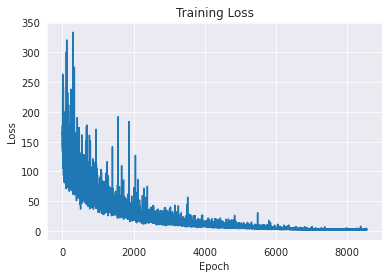

In [200]:
# After the training, plot the training loss values
plt.plot(loss_values)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

### Load model

In [25]:
DATA_DIRECTORY = '/media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/inxai/examples/jgama/serialised'

In [ ]:
### Download serialised model_iris
# ! /media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/inxai/examples/jgama/serialised

# skip
# ! cd /content/jgama/ && wget https://github.com/sbobek/inxai/blob/time-series/examples/jgama/serialised/IrisAutoencoder_v2c.pht
# ! cd /content/jgama/ && wget https://github.com/sbobek/inxai/blob/time-series/examples/jgama/serialised/IrisAutoencoder_versicolor_v1.pht
# ! cd /content/jgama/ && wget https://github.com/sbobek/inxai/blob/time-series/examples/jgama/serialised/RuleRegressor_reg_v1.pickle
# ! cd /content/jgama/ && wget https://github.com/sbobek/inxai/blob/time-series/examples/jgama/serialised/RuleRegressor_reg_v2.pickle
! cd /media/mmozolewski/m.mozolewski@gma2/Documents/Doktorat/inxai/examples/jgama/serialised && wget https://github.com/sbobek/inxai/blob/time-series/examples/jgama/serialised/Iris_contrastive_model_versicolor_v7.pht

In [26]:
# There is some problem with loading the file, one need to upload it once again manually
model_iris = ContrastiveModel(IrisAutoencoder3())
model_iris.load_state_dict(torch.load(f'{DATA_DIRECTORY}/Iris_contrastive_model_versicolor_v7.pht'))

<All keys matched successfully>

In [27]:
model_iris.eval()

ContrastiveModel(
  (autoencoder): IrisAutoencoder3(
    (encoder): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU(inplace=True)
      (2): Dropout(p=0.2, inplace=False)
      (3): Linear(in_features=8, out_features=4, bias=True)
      (4): ReLU(inplace=True)
      (5): Linear(in_features=4, out_features=2, bias=True)
      (6): ReLU(inplace=True)
    )
    (decoder): Sequential(
      (0): Linear(in_features=2, out_features=4, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=4, out_features=8, bias=True)
      (3): ReLU(inplace=True)
      (4): Dropout(p=0.2, inplace=False)
      (5): Linear(in_features=8, out_features=4, bias=True)
      (6): ReLU(inplace=True)
    )
  )
)

### 3. Test autoencoder, visualise losses and choose cutoff

In [28]:
X_normal = normal_gauss_df.iloc[int(N / 2):][['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
X_anomaly_1 = anomaly_1_gauss_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
X_anomaly_2 = anomaly_2_gauss_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].to_numpy()
print(f"X_normal # ={len(X_normal)}")
print(f"X_anomaly_1 # ={len(X_anomaly_1)}")
print(f"X_anomaly_2 # ={len(X_anomaly_2)}")

X_normal = scaler.transform(X_normal)
X_anomaly_1 = scaler.transform(X_anomaly_1)
X_anomaly_2 = scaler.transform(X_anomaly_2)

X_normal_pt = torch.FloatTensor(X_normal)
X_anomaly_1_pt = torch.FloatTensor(X_anomaly_1)
X_anomaly_2_pt = torch.FloatTensor(X_anomaly_2)

X_normal # =500
X_anomaly_1 # =500
X_anomaly_2 # =500


In [29]:
def print_loss(X_tensor, model, label=''):
    model.eval()
    with torch.no_grad():
        output = model(X_tensor)
        loss = criterion(output, X_tensor)

    print(f"[{label}] test Loss= {loss.item()}")


criterion = nn.MSELoss()

print_loss(X_normal_pt, model_iris, f"Norm= {NORMAL_CLASS}")
print_loss(X_anomaly_1_pt, model_iris, f"Anomal1= {ANOMALY_CLASS_1}")
print_loss(X_anomaly_2_pt, model_iris, f"Anomal2= {ANOMALY_CLASS_2}")

[Norm= versicolor] test Loss= 1.4834474325180054
[Anomal1= setosa] test Loss= 4.84684944152832
[Anomal2= virginica] test Loss= 1.5687894821166992


In [30]:
def get_losses(X_tensor, model, label=''):
    losses = []
    _criterion = nn.MSELoss()
    with torch.no_grad():
        for sample in X_tensor:
            output = model(sample)
            loss = _criterion(output, sample)
            losses.append(loss.item())

    # Choose a cutoff value
    cutoff = sum(losses) / len(losses)
    if label:
        print("[", label, '] Cutoff Loss:', cutoff)
    else:
        print('Cutoff Loss:', cutoff)

    return losses, cutoff

### MODEL for versicolor

[ Norm= versicolor ] Cutoff Loss: 1.483447451494634
[ Anomal1= setosa ] Cutoff Loss: 4.84684978556633


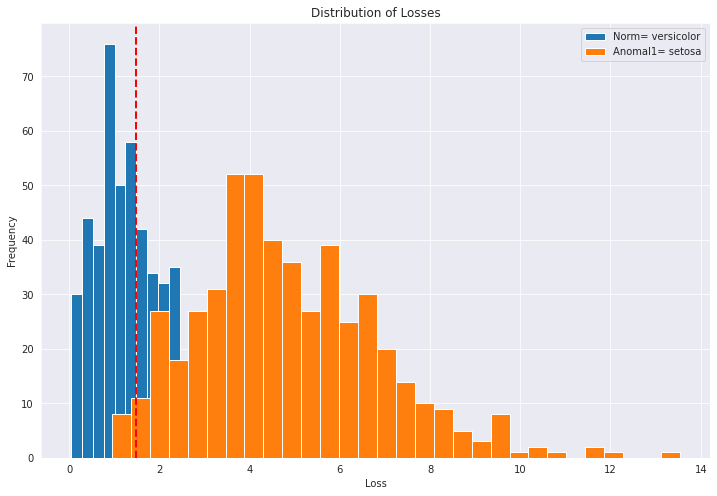

In [57]:
losses_normal, cutoff_normal = get_losses(X_normal_pt, model_iris, f"Norm= {NORMAL_CLASS}")
losses_anomaly_1, cutoff_anomaly_1 = get_losses(X_anomaly_1_pt, model_iris, f"Anomal1= {ANOMALY_CLASS_1}")

# Create a figure with defined size (width, height)
plt.figure(figsize=(12, 8))

plt.hist(losses_normal, bins=30, label=f"Norm= {NORMAL_CLASS}")
plt.hist(losses_anomaly_1, bins=30, label=f"Anomal1= {ANOMALY_CLASS_1}")
plt.axvline(cutoff_normal, color='r', linestyle='dashed', linewidth=2)

plt.title('Distribution of Losses')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()  # add this to display the labels

plt.show()

[ Norm= versicolor ] Cutoff Loss: 1.483447451494634
[ Anomal1= virginica ] Cutoff Loss: 1.5687895685359836


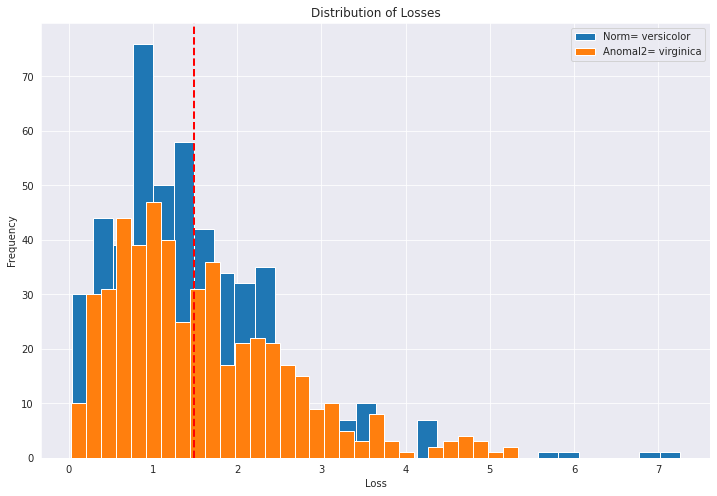

In [58]:
losses_normal, cutoff_normal = get_losses(X_normal_pt, model_iris, f"Norm= {NORMAL_CLASS}")
losses_anomaly_2, cutoff_anomaly_2 = get_losses(X_anomaly_2_pt, model_iris, f"Anomal1= {ANOMALY_CLASS_2}")

# Create a figure with defined size (width, height)
plt.figure(figsize=(12, 8))

plt.hist(losses_normal, bins=30, label=f"Norm= {NORMAL_CLASS}")
plt.hist(losses_anomaly_2, bins=30, label=f"Anomal2= {ANOMALY_CLASS_2}")
plt.axvline(cutoff_normal, color='r', linestyle='dashed', linewidth=2)

plt.title('Distribution of Losses')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()  # add this to display the labels

plt.show()

[ Norm= versicolor ] Cutoff Loss: 1.483447451494634
[ Anomal1= setosa ] Cutoff Loss: 4.84684978556633
[ Anomal2= virginica ] Cutoff Loss: 1.5687895685359836


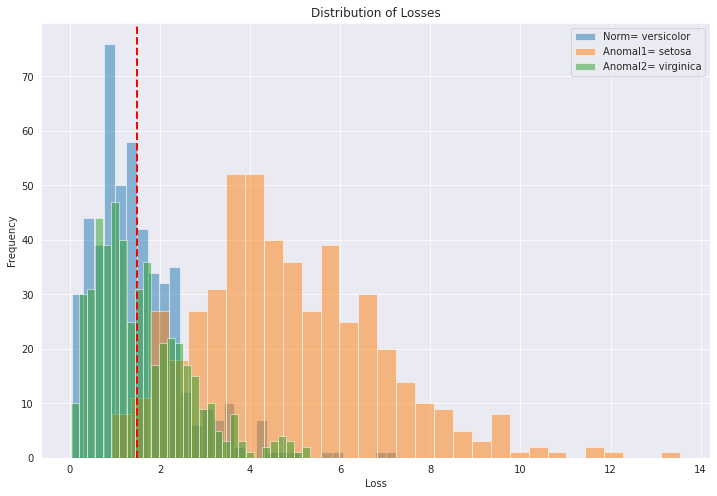

In [59]:
losses_normal, cutoff_normal = get_losses(X_normal_pt, model_iris, f"Norm= {NORMAL_CLASS}")
losses_anomaly_1, cutoff_anomaly_1 = get_losses(X_anomaly_1_pt, model_iris, f"Anomal1= {ANOMALY_CLASS_1}")
losses_anomaly_2, cutoff_anomaly_2 = get_losses(X_anomaly_2_pt, model_iris, f"Anomal2= {ANOMALY_CLASS_2}")

# Create a figure with defined size (width, height)
plt.figure(figsize=(12, 8))

plt.hist(losses_normal, bins=30, label=f"Norm= {NORMAL_CLASS}", alpha=0.5)
plt.hist(losses_anomaly_1, bins=30, label=f"Anomal1= {ANOMALY_CLASS_1}", alpha=0.5)
plt.hist(losses_anomaly_2, bins=30, label=f"Anomal2= {ANOMALY_CLASS_2}", alpha=0.5)
plt.axvline(cutoff_normal, color='r', linestyle='dashed', linewidth=2)

plt.title('Distribution of Losses')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()  # add this to display the labels
plt.show()
# Anomal2 is slightly distinguished from Norm

In [31]:
# Concatenate to form the test set
X_test = np.concatenate((X_normal, X_anomaly_1))
y_test = np.concatenate((np.zeros(len(X_normal)), np.ones(len(X_anomaly_1))))

# Convert to tensors
X_test_pt = torch.FloatTensor(X_test)

Cutoff Loss: 3.1651486185304822
Best Threshold=2.482920, G-Mean=0.888


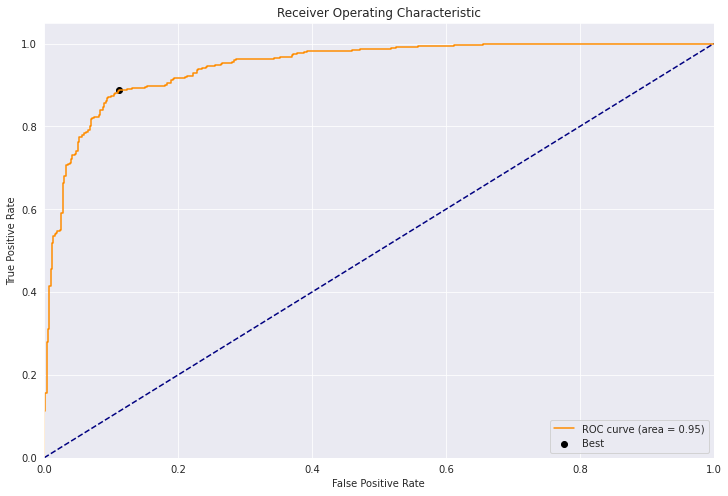

In [32]:
losses_2, _ = get_losses(X_test_pt, model_iris)  # IrisAutoencoder_versicolor_v1.pht

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, losses_2, pos_label=1)
roc_auc = auc(fpr, tpr)
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
BEST_TRESHOLD = thresholds[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (BEST_TRESHOLD, gmeans[ix]))

# Plot ROC curve
# Create a figure with defined size (width, height)
plt.figure(figsize=(12, 8))

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### both anomaly classes

In [33]:
# Iris_contrastive_model_versicolor_v5.pht :
LOSS_THRESHOLD = BEST_TRESHOLD
print(f"loss threshold set to {LOSS_THRESHOLD}")

y_test_pred = [0.0 if l < LOSS_THRESHOLD else 1.0 for l in losses_2]
y_test_pred_names = ['normal (versicolor)' if l < LOSS_THRESHOLD else 'anomaly' for l in losses_2]

confusion = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix\n')
print(confusion)

print('\nAccuracy: {:.2f}, samples={}\n'.format(accuracy_score(y_test, y_test_pred), len(y_test)))

loss threshold set to 2.4829204082489014
Confusion Matrix

[[444  56]
 [ 56 444]]

Accuracy: 0.89, samples=1000



Cutoff Loss: 2.6330289351989826
Best Threshold=2.432314, G-Mean=0.690


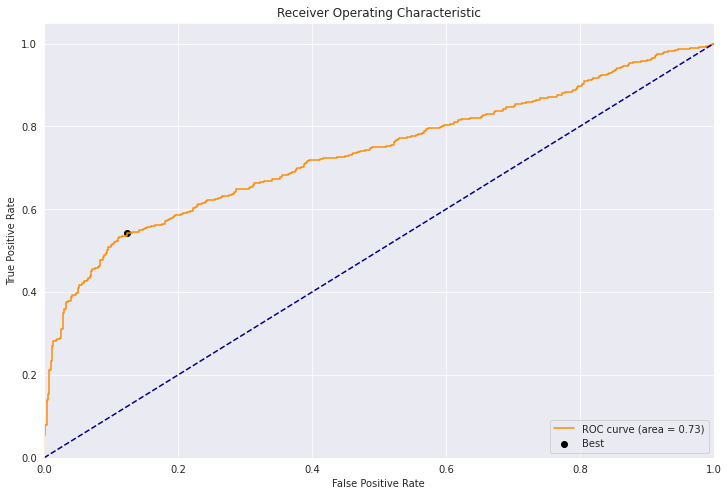

In [34]:
# Concatenate to form the test set
X_test_3 = np.concatenate((X_normal, X_anomaly_1, X_anomaly_2))
y_test_3 = np.concatenate((np.zeros(len(X_normal)), np.ones(len(X_anomaly_1)), np.ones(len(X_anomaly_2))))

# Convert to tensors
X_test_3_pt = torch.FloatTensor(X_test_3)

losses_3, _ = get_losses(X_test_3_pt, model_iris)  # Iris_contrastive_model_versicolor_v5.pht

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_3, losses_3, pos_label=1)
roc_auc = auc(fpr, tpr)
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
BEST_TRESHOLD_ALL_CLASSES = thresholds[ix]
print('Best Threshold=%f, G-Mean=%.3f' % (BEST_TRESHOLD_ALL_CLASSES, gmeans[ix]))

# Plot ROC curve
# Create a figure with defined size (width, height)
plt.figure(figsize=(12, 8))

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [58]:
# Iris_contrastive_model_versicolor_v5.pht :
# LOSS_THRESHOLD_3 = 1.899307 # ale tego nie znamy
LOSS_THRESHOLD_3 = LOSS_THRESHOLD
print(f"loss threshold set to {LOSS_THRESHOLD_3}")

y_test_3_pred = [0.0 if l < LOSS_THRESHOLD_3 else 1.0 for l in losses_3]
y_test_3_pred_names = ['normal (versicolor)' if l < LOSS_THRESHOLD_3 else 'anomaly' for l in losses_3]

confusion = confusion_matrix(y_test_3, y_test_3_pred)
print('Confusion Matrix\n')
print(confusion)

print('\nAccuracy: {:.2f}, samples={}\n'.format(accuracy_score(y_test_3, y_test_3_pred), len(y_test_3)))

# If we have had access to anomaly2:
LOSS_THRESHOLD_3 = BEST_TRESHOLD_ALL_CLASSES
print(f"loss threshold set to {LOSS_THRESHOLD_3}")

y_test_3_pred_treshold_all = [0.0 if l < LOSS_THRESHOLD_3 else 1.0 for l in losses_3]
y_test_3_pred_names_treshold_all = ['normal (versicolor)' if l < LOSS_THRESHOLD_3 else 'anomaly' for l in losses_3]

confusion = confusion_matrix(y_test_3, y_test_3_pred_treshold_all)
print('Confusion Matrix\n')
print(confusion)

print('\nAccuracy: {:.2f}, samples={}\n'.format(accuracy_score(y_test_3, y_test_3_pred_treshold_all), len(y_test_3)))

loss threshold set to 2.4829204082489014
Confusion Matrix

[[444  56]
 [468 532]]

Accuracy: 0.65, samples=1500

loss threshold set to 2.4323136806488037
Confusion Matrix

[[438  62]
 [457 543]]

Accuracy: 0.65, samples=1500



# 4. Rule-based explainer

## 4.A. Explain reconstruction loss - DELETED

## 4.B. Explain class

## Ordinary DecisionTreeClassifier

### Back from scaled to original

In [82]:
def unscale_data(scaled_data: Union[np.ndarray, torch.Tensor, pd.DataFrame], scaler: StandardScaler) -> pd.DataFrame:
    """Unscale data that has been previously scaled with a StandardScaler.

    Args:
        scaled_data (Union[np.ndarray, torch.Tensor, pd.DataFrame]): The scaled data. Can be a numpy array, Torch tensor or a pandas DataFrame.
        scaler (StandardScaler): The StandardScaler instance that was used to scale the data.

    Returns:
        pd.DataFrame: The unscaled data as a pandas DataFrame.
    """
    # If the data is a DataFrame, convert it to a numpy array
    if isinstance(scaled_data, pd.DataFrame):
        print("Got pd.DataFrame")
        scaled_data = scaled_data.to_numpy()
    # If the data is a Torch tensor, convert it to a numpy array
    elif isinstance(scaled_data, torch.Tensor):
        print("Got torch.Tensor")
        scaled_data = scaled_data.numpy()
    else:
        print(f"Got {type(scaled_data)}")


    # Use the inverse_transform method to unscale the data
    unscaled_data = scaler.inverse_transform(scaled_data)

    # Convert the unscaled data to a DataFrame
    unscaled_df = pd.DataFrame(unscaled_data, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
    print(unscaled_df.info())

    return unscaled_df

X_test_3_unscaled_df = unscale_data(X_test_3, scaler)

Got <class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  1500 non-null   float64
 1   sepal width (cm)   1500 non-null   float64
 2   petal length (cm)  1500 non-null   float64
 3   petal width (cm)   1500 non-null   float64
dtypes: float64(4)
memory usage: 47.0 KB
None


In [83]:
# for LUX, no spaces
_feature_names = [n.replace(' ', '_').replace('(', '').replace(')', '') for n in iris.feature_names]
print(_feature_names)
X_test_3_unscaled_df.columns = _feature_names

# test_3_df = pd.DataFrame(X_test_3, columns=_feature_names)  # DONE scaled
X_test_3_unscaled_df['target'] = [0 if y==0.0 else 1 for y in y_test_3_pred]
X_test_3_unscaled_df

['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
0,4.401949,3.505135,5.029941,3.144929,0
1,6.399442,3.751601,4.455423,1.201474,0
2,5.605442,3.119132,5.590868,1.861330,0
3,7.020198,1.691713,5.543054,3.221727,0
4,5.585888,1.564164,4.030159,0.722455,0
...,...,...,...,...,...
1495,6.425911,3.406992,5.336392,0.661449,0
1496,5.805692,2.733606,5.604360,1.740384,0
1497,4.517226,1.949367,5.332575,0.590502,1
1498,6.328695,2.912623,4.969802,2.910546,0


In [85]:
# we simulate that we only know normal and anomaly_1 ??
classifier = DecisionTreeClassifier(max_depth=3)
classifier = classifier.fit(X_test_3_unscaled_df[_feature_names], y_test_3_pred_names)

# Print the rules
rules_classifier = export_text(classifier, feature_names=_feature_names)
print(rules_classifier)

|--- petal_length_cm <= 2.32
|   |--- sepal_length_cm <= 5.97
|   |   |--- petal_length_cm <= 2.10
|   |   |   |--- class: anomaly
|   |   |--- petal_length_cm >  2.10
|   |   |   |--- class: anomaly
|   |--- sepal_length_cm >  5.97
|   |   |--- petal_length_cm <= 1.46
|   |   |   |--- class: anomaly
|   |   |--- petal_length_cm >  1.46
|   |   |   |--- class: normal (versicolor)
|--- petal_length_cm >  2.32
|   |--- sepal_length_cm <= 4.54
|   |   |--- petal_width_cm <= 1.22
|   |   |   |--- class: anomaly
|   |   |--- petal_width_cm >  1.22
|   |   |   |--- class: anomaly
|   |--- sepal_length_cm >  4.54
|   |   |--- petal_width_cm <= -0.41
|   |   |   |--- class: anomaly
|   |   |--- petal_width_cm >  -0.41
|   |   |   |--- class: normal (versicolor)



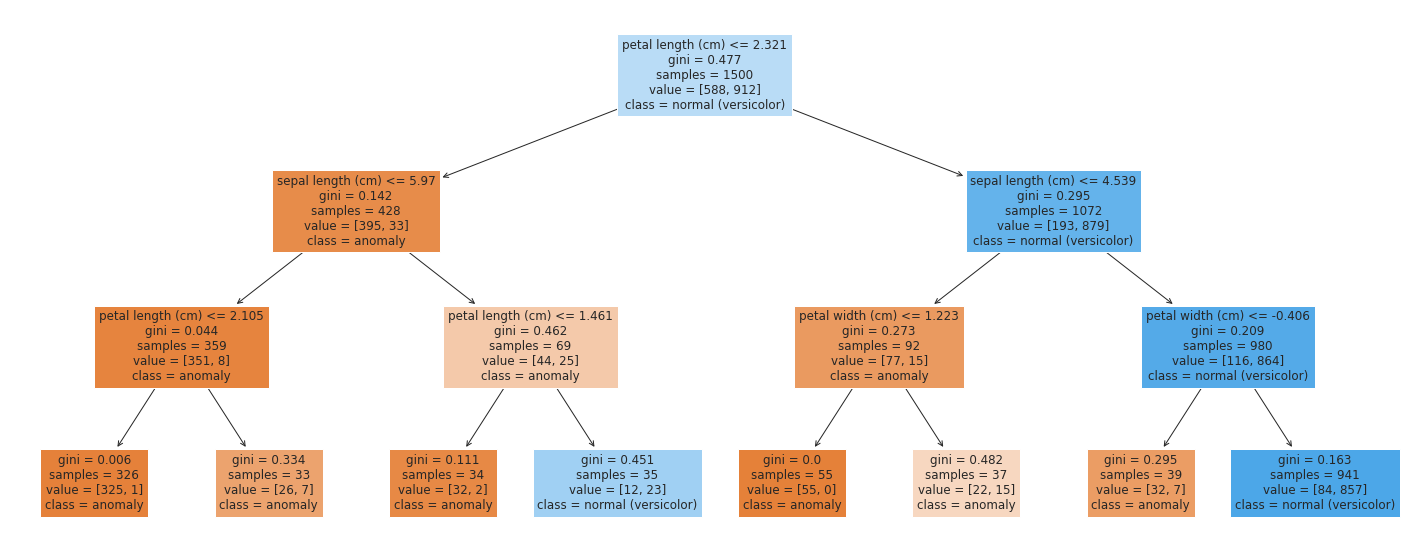

In [86]:
plt.figure(figsize=(25,10))  # Set the figure size
plot_tree(classifier, feature_names=iris.feature_names, class_names=classifier.classes_, filled=True)
plt.show()

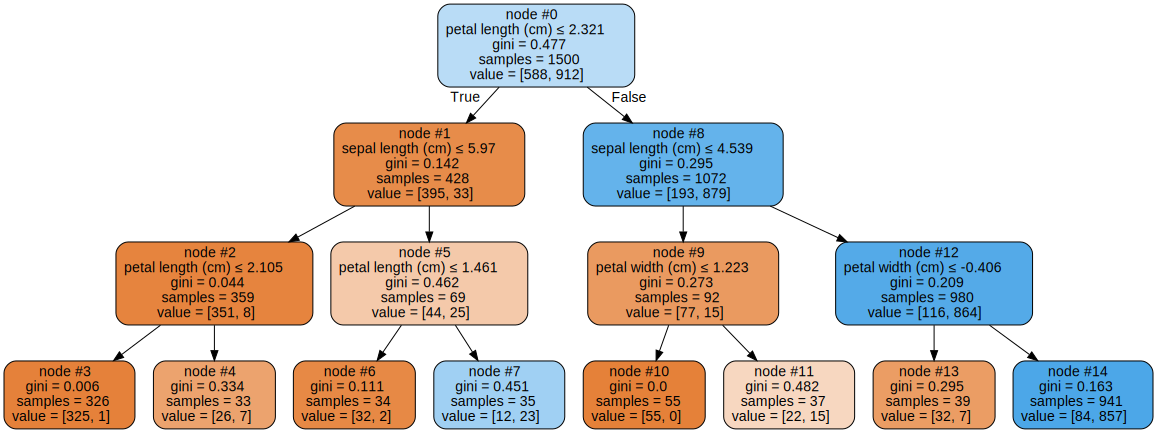

In [87]:
dot_data_3 = tree.export_graphviz(classifier, out_file=None,
                                feature_names=iris.feature_names,
                                filled=True, rounded=True,
                                special_characters=True,
                                node_ids=True)

graphviz.Source(dot_data_3, format='svg')

### Take into account margin around Treshold - DELETED

## Rulekit for recoded loss

In [ ]:
### some Java errors
rule_kit_clf = RuleClassifier(
    induction_measure=Measures.RSS,
    pruning_measure=Measures.RSS,
    voting_measure=Measures.RSS,
)
rule_kit_clf.fit(X_test_3, y_test_3_pred)

# prediction = rule_kit_clf.predict(X_test_3)
# print(prediction)

In [ ]:
for i, rule in enumerate(rule_kit_clf.model.rules):
    print(f"---------------- {i+1} ----------------  ")
    print(rule, rule.stats)

## LUX (Sz. Bobek package)

In [102]:
#pick some instance from datasetr
iris_instance = X_test_3_unscaled_df.sample(1)
print(iris_instance)
print(f"PREDICTED CLASS= {iris_instance['target'].values[0]}")
iris_instance = iris_instance[_feature_names].values

#train lux on neighbourhood equal 20 instances
lux = LUX(predict_proba = classifier.predict_proba, neighborhood_size=20, max_depth=2,  node_size_limit = 1, grow_confidence_threshold = 0 )
lux.fit(X_test_3_unscaled_df[_feature_names], X_test_3_unscaled_df['target'], instance_to_explain=iris_instance, class_names=[0, 1])

#see the justification of the instance being classified for a given class
lux.justify(np.array(iris_instance))

     sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  target
265         6.096389        2.578656         6.064422        1.206836       0
PREDICTED CLASS= 0


['IF sepal_length_cm >= 5.525430391744843 AND petal_width_cm >= 0.011081602550664649 THEN class = 1 # 1.0\n']

#### Explanation on **observation level**

In [103]:
_cfs = lux.counterfactual(np.array(iris_instance), X_test_3_unscaled_df[_feature_names], counterfactual_representative='nearest', topn=1)
print(_cfs)

_cf = _cfs[0]
print(f"Counterfactual for {iris_instance} to change from class {lux.predict(np.array(iris_instance))[0]} to class {_cf['prediction']}: \n{_cf['counterfactual']}")

[{'rule': {'sepal_length_cm': ['< 5.525430391744843']}, 'prediction': '0', 'confidence': 1.0, 'covered':       sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
0            4.401949        3.505135         5.029941        3.144929
7            5.352719        2.230016         2.432109        0.041938
8            4.922051        2.038614         4.748037        1.489986
9            5.504207        3.808433         3.869996        1.905279
12           5.312063        3.028169         4.873883        0.322960
...               ...             ...              ...             ...
1468         5.054404        3.962590         4.438725        0.847302
1472         4.895867        3.012096         4.860177        1.911066
1480         5.522101        4.965287         3.756942        3.760446
1482         5.439171        3.428336         6.190135        1.744569
1497         4.517226        1.949367         5.332575        0.590502

[628 rows x 4 columns], 'counterfactual': 

#### Explanation on **global level**

In [ ]:
lux.uid3.tree.save_dot('tree.dot',fmt='.2f',visual=True, background_data=X_test_3_unscaled_df[_feature_names])
gvz=graphviz.Source.from_file('tree.dot')
!dot -Tpng tree.dot > tree.png
Image('tree.png')

In [ ]:
# TODO
# 1. To co Gama: RIPPER, TREPAN, CORELS, IDS, BRCG
#
# 2. Domain adaption - domena sie zmienia - te same klasy do tej samej przestrzeni
# - semisupervsed ~ contrastic learning (https://adapt-python.github.io/adapt/generated/adapt.feature_based.DANN.html, https://colab.research.google.com/drive/1qCVBqEd81uMB53zakqJp4M01zXiTOrET#scrollTo=bC3ZKEa6cNfk)
# - UWAGA: wątek poboczny
#
# 3. Jak włączyć HITL? Np. ekspert mówi, że to anomalia
# - ekspertowi trzeba pomóc, wyjaśnić